In [13]:
import pickle
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [15]:
data = pd.read_pickle("bayesian array")
nodes = pd.read_pickle("bayesian nodes")

In [11]:
for i in range(1617):
    if data[0][i]==0:
        print('found true zero')

found true zero
found true zero
found true zero
found true zero


In [10]:
len(data[0])

1617

In [25]:
def r_pow(x, n, d):
    """
    Compute x to the power of n/d (not reduced to lowest
    expression) with the correct function real domains.
    
    ARGS:
        x (int,float,array): base
        n (int)            : exponent numerator
        d (int)            : exponent denominator
        
    RETURNS:
        x to the power of n/d
    """
    
    # list to array
    if type(x) == list:
        x = np.array(x)
    # check inputs
    if type(n) != int or type(d) != int:
        raise Exception("Exponent numerator and denominator must be integers")
    # if denominator is zero
    if not d:
        raise Exception("Exponent denominator cannot be 0")
        
    # raise x to power of n
    X = x**n
    # even denominator
    if not d % 2:
        # domain is for X>=0 only
        if type(x) == np.ndarray:
            X[X<0] = np.nan
        elif X < 0:
            X = np.nan
        res = np.power(X, 1./d)
        return res
    # odd denominator
    else:
        # domain is all R
        res = np.power(np.abs(X), 1./d)
        res *= np.sign(X)
        return res

In [40]:
roots = [r_pow(data[0][i], 1, nodes[0][i]) for i in range(1617)] 

C:\Users\f00689q\AppData\Local\Temp\ipykernel_22016\300868414.py:2: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0,0.5])


(np.float64(1.0007764117799623e-209), 0.5)

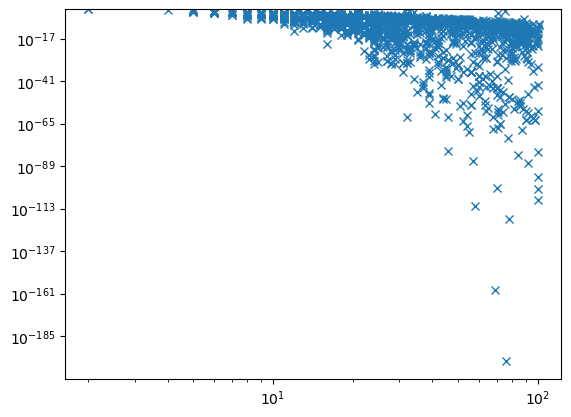

In [38]:
plt.loglog(nodes[0], data[0], lw=0, marker='x')
plt.ylim([0,0.5])

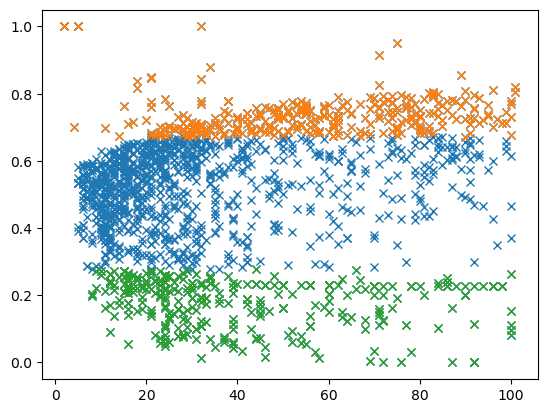

In [50]:
plt.plot(nodes[0], roots, lw=0, marker='x')
top20 = np.array([[nodes[0][i], roots[i]] for i in range(1617) if roots[i]>=np.percentile(roots,80)]).T
plt.plot(top20[0], top20[1], lw=0, marker='x')
bottom20 = np.array([[nodes[0][i], roots[i]] for i in range(1617) if roots[i]<np.percentile(roots,20)]).T
plt.plot(bottom20[0], bottom20[1], lw=0, marker='x')


np.float64(0.6723009742580006)